In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

import fireworks
from fireworks.nbodylib import dynamics as dyn
from fireworks.nbodylib import integrators as intg
from fireworks import ic
import numpy as np
import matplotlib.pyplot as plt

from evolver import evolve

In [2]:
particles = ic.ic_two_body(1,1,1,0)
(acc_list, potential_list, positions, velocities, energy,init_energy,jerk_) = evolve(particles, intg.integrator_euler)

/root/miniconda3/lib/python3.10/site-packages/fireworks/particles.py:173: RuntimeWarning: divide by zero encountered in divide
  Epot = -0.5 * np.sum(mass_product[:,:,np.newaxis] / np.sqrt(rij**2 + softening**2))


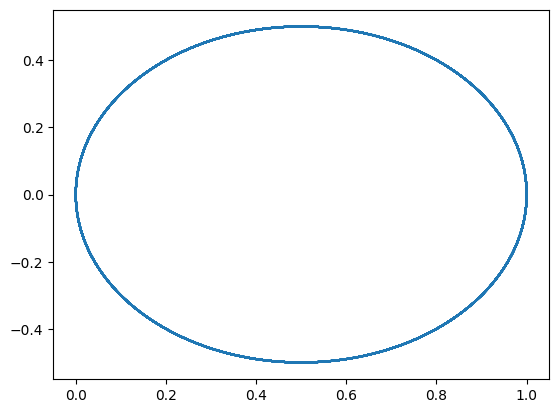

In [4]:
plt.plot(positions[:,0,0],positions[:,0,1])

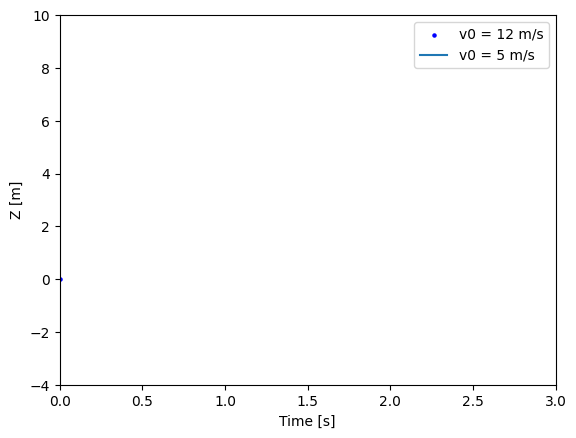

In [8]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

/root/miniconda3/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
MovieWriter ffmpeg unavailable; using Pillow instead.


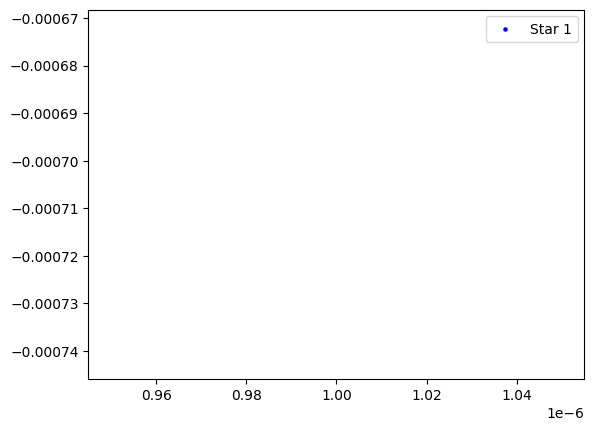

In [7]:
fig, ax = plt.subplots()

scat = ax.scatter(positions[0,0,0], positions[0,0,1], c="b", s=5, label="Star 1")
ax.legend()

def update(frame):
    # for each frame, update the data stored on each artist.
    x = positions[:frame,0,0]
    y = positions[:frame,0,1]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    return (scat)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()
